# Algorithmic Question

## PART A

In [ ]:
# Input
input_text = """14 10 2
SWM VOL ATH VOL VOL BSK HCK BSK SWM BSK
1
BSK 98
2
ATH 14
3
HCK 82
4
HCK 9
5
FTB 90
6
ATH 52
7
HCK 95
8
TEN 85
9
RGB 46
10
SWM 16
11
VOL 32
12
SOC 41
13
SWM 59
14
SWM 34
"""

# Split the input text into lines
lines = input_text.strip().split('\n')

# Extract N, M, and S from the first line
number_of_athletes, number_of_selected_athletes, number_of_skills = map(int, lines[0].split())

# Extract the set of required skills
required_skills = lines[1].split()

# Initialize dictionary for maximum proficiency
max_proficiency = {skill: 0 for skill in required_skills}

# Process each athlete's information and update maximum proficiency
athlete_info = []
for i in range(2, len(lines), 2):
    athlete_id = int(lines[i])
    current_skill, proficiency = lines[i + 1].split()
    proficiency = int(proficiency)

    # Check if the skill is in the set of required skills
    if current_skill in required_skills:
        # Update maximum proficiency for the current skill
        if proficiency > max_proficiency[current_skill]:
            max_proficiency[current_skill] = proficiency

        # Store athlete's information
        athlete_info.append((athlete_id, current_skill, proficiency))

# Sort athletes by proficiency in descending order
athlete_info.sort(key=lambda x: x[2], reverse=True)

# Select the top M athletes and calculate overall score
selected_athletes = athlete_info[:number_of_selected_athletes]
overall_score = sum(athlete[2] for athlete in selected_athletes)

# Print the final result
print("The maximum overall score for Team Rome is:", overall_score)


The maximum overall score for Team Rome is: 491


In [ ]:
# Input
input_text = """14 10 2
SWM VOL ATH VOL VOL BSK HCK BSK SWM BSK
1
BSK 98
HCK 12
2
ATH 14
VOL 1
3
HCK 82
ATH 30
4
HCK 9
SWM 27
5
FTB 90
HCK 50
6
ATH 52
RGB 80
7
HCK 95
SWM 11
8
TEN 85
RGB 7
9
RGB 46
SWM 30
10
SWM 16
BSK 12
11
VOL 32
HCK 40
12
SOC 41
FTB 12
13
SWM 59
TEN 82
14
SWM 34
VOL 20
"""

# Split the input text into lines
lines = input_text.strip().split('\n')

# Extract N, M, and S from the first line
number_of_athletes, number_of_selected_athletes, number_of_skills = map(int, lines[0].split())

# Extract the set of required skills
required_skills = lines[1].split()

# Initialize dictionary for maximum proficiency
max_proficiency = {skill: 0 for skill in required_skills}

# Process each athlete's information and update maximum proficiency
athlete_info = []
for i in range(2, len(lines), S + 1):
    athlete_id = int(lines[i])
    skills = lines[i + 1:i + S + 1]

    for skill_info in skills:
        skill, proficiency = skill_info.split()
        proficiency = int(proficiency)

        # Check if the skill is in the set of required skills
        if skill in required_skills:
            # Update maximum proficiency for the current skill
            if proficiency > max_proficiency[skill]:
                max_proficiency[skill] = proficiency

            # Store athlete's information
            athlete_info.append((athlete_id, skill, proficiency))

# Sort athletes by proficiency in descending order
athlete_info.sort(key=lambda x: x[2], reverse=True)

# Select the top M athletes and calculate overall score
selected_athletes = athlete_info[:number_of_selected_athletes]
overall_score = sum(athlete[2] for athlete in selected_athletes)

# Print the final result
print("The maximum overall score for Team Rome is:", overall_score)


The maximum overall score for Team Rome is: 572


Time Complexity Analysis:

Let's analyze the time complexity of the provided solution.

Initialization of max_proficiency dictionary: This operation takes O(S) time since we iterate over the skills_required list (which has a maximum length of S).
Processing candidates and updating maximum proficiency: In the worst case, we process N athletes, each with S skills. Therefore, this part has a time complexity of O(N * S).
Sorting candidates: The sorting operation takes O(N * log(N)) time, where N is the number of athletes.
Selecting top M candidates: This operation takes O(M) time.
The overall time complexity can be expressed as O(S + N * S + N * log(N) + M), and in big O notation, we consider the dominant term, which is N * log(N). Therefore, the time complexity of the solution is O(N * log(N)).

ChatGPT and Bard are calculating the Time complexity as the same as I found

Exponential Time Complexity:

The provided solution does not have an exponential time complexity. It is dominated by the sorting operation, which has a time complexity of O(N * log(N)).

Polynomial-Time Version:

The solution already has a polynomial time complexity, and there is no need for further optimization in this regard.

Changing S to 1:

If S is set to 1, the solution simplifies as each athlete has only one skill. In this case, the time complexity becomes O(N * log(N)) due to the sorting operation. The processing of skills within each athlete remains O(N), and the overall complexity is influenced more by the sorting step.

## PART B

### 1. Proof of NP-Completeness:

The problem described can be shown to be NP-complete by reduction from the Hamiltonian Cycle Problem, which is a known NP-complete problem.

Given an instance of the Hamiltonian Cycle Problem with a graph G=(V, E), construct an instance of the new problem as follows:

Set X = V.
Define T as the set of all possible skills.
For each edge (u, v) in E, add a corresponding edge between the nodes u and v in the new problem with weight 1.
Now, finding a team X' in the new problem with minimum effort E_c(V') that covers all skills in T is equivalent to finding a Hamiltonian Cycle in the original graph G. The effort to work together, represented by the weight of edges in X', corresponds to the length of the Hamiltonian Cycle.

Since the Hamiltonian Cycle Problem is NP-complete, the new problem is also NP-complete.

### 2. Heuristic for Approximation:

A simple heuristic for approximating the best solution is the Minimum Spanning Tree (MST) heuristic:

1.Construct the complete graph G=(V, E) where each node corresponds to an individual and each edge has a weight equal to the effort required to work well together.

2.Find the Minimum Spanning Tree T of G.

3.Select the nodes corresponding to the vertices of T as the team X'.

This heuristic is efficient and provides a reasonable approximation for the minimum effort to work together. However, it may not always yield the optimal solution.

In [ ]:
Function MST_Heuristic(X, G):
    # X is the set of individuals (nodes), G is the complete graph with weights representing efforts

    # Initialize an empty set to store the selected nodes
    selected_nodes = Set()

    # Add an arbitrary starting node to the set
    starting_node = arbitrary_node(X)
    selected_nodes.add(starting_node)

    # Initialize an empty priority queue to store edges sorted by weight
    edge_queue = PriorityQueue()

    # Add all edges connected to the starting node to the priority queue
    for edge in edges_connected_to(starting_node, G):
        edge_queue.add(edge)

    # While not all nodes are selected
    while len(selected_nodes) < len(X):
        # Get the edge with the minimum weight from the priority queue
        min_edge = edge_queue.pop_min()

        # Add the target node of the edge to the selected nodes set
        selected_nodes.add(min_edge.target_node)

        # Add all edges connected to the newly selected node to the priority queue
        for edge in edges_connected_to(min_edge.target_node, G):
            edge_queue.add(edge)

    return selected_nodes

# Call the MST_Heuristic function with the set of individuals (X) and the complete graph (G)
selected_team = MST_Heuristic(X, G)


### 3. Time Complexity of the Heuristic:

The time complexity of the MST heuristic is dominated by the step of finding the Minimum Spanning Tree. Various algorithms, such as Prim's or Kruskal's algorithm, can be employed to find the MST.

Assuming the graph has N nodes, the time complexity of finding the MST using Prim's algorithm is O(N^2) with an adjacency matrix representation and O(E * log(N)) with an adjacency list representation, where E is the number of edges.

In conclusion, the time complexity of the heuristic is primarily determined by the MST algorithm chosen and the representation of the graph.

# Command Line Question (CLQ)

## Full Script

In [ ]:
#!/bin/bash

# Analyze betweenness centrality and node degrees from graph_analysis.txt

echo "Analyzing betweenness centrality and node degrees from graph_analysis.txt"

# Question 1

# Display top 5 nodes by betweenness centrality
echo "Top 5 nodes by betweenness centrality:"
sort -k2 -nr graph_analysis.txt | head -5
echo "" # Add a blank line for better readability

# Question 2

# Calculate and display degree variation among nodes (Answer to Question 2)
echo "Degree variation among nodes:"
awk '{sum += $3; sqsum += $3 * $3; count++} END {print "Average Degree: " sum/count; print "Standard Deviation: " sqrt(sqsum/count - (sum/count)^2)}' graph_analysis.txt
echo "" # Add a blank line for better readability

# Question 3

# Use Python to calculate average shortest path length from the saved graph
echo "Calculating average shortest path length using Python:"
python3 - <<EOF
import pickle
import networkx as nx

# Load the graph from the pickle file
with open('citation_graph.pkl', 'rb') as file:
    citation_graph = pickle.load(file)

# Method 1: Using NetworkX's average_shortest_path_length function
try:
    avg_path_length_nx = nx.average_shortest_path_length(citation_graph)
    print(f"Average Shortest Path Length (NetworkX method): {avg_path_length_nx}")
except nx.NetworkXError:
    print("Graph is not connected, average shortest path not computable using NetworkX method.")

# Method 2: Using breadth-first search (BFS) for each node
def calculate_avg_shortest_path_bfs(graph):
    total_length, total_paths = 0, 0
    for source in graph:
        path_lengths = nx.single_source_shortest_path_length(graph, source)
        total_length += sum(path_lengths.values())
        total_paths += len(path_lengths) - 1  # Exclude the path to the source itself
    return total_length / total_paths if total_paths > 0 else 0

avg_path_length_bfs = calculate_avg_shortest_path_bfs(citation_graph)
print(f"Average Shortest Path Length (BFS method): {avg_path_length_bfs}")
EOF


### Overview

In [ ]:
# Display top 5 nodes by betweenness centrality (Answer to Question 1)
echo "Top 5 nodes by betweenness centrality:"
sort -k2 -nr graph_analysis.txt | head -5
echo "" # Add a blank line for better readability


1. Betweenness Centrality Analysis: The script sorts the data in graph_analysis.txt by the betweenness centrality values (second column) in descending order and displays the top 5 nodes. This addresses the question about identifying important connector nodes in the graph.
2. sort -k2 -nr sorts the lines based on the second column (betweenness centrality) in numerical and reverse order.
3. head -5 outputs the top 5 lines from the sorted list.
4. An additional echo "" command is used to insert a blank line for better readability in the output.

In [ ]:
# Calculate and display degree variation among nodes (Answer to Question 2)
echo "Degree variation among nodes:"
awk '{sum += $3; sqsum += $3 * $3; count++} END {print "Average Degree: " sum/count; print "Standard Deviation: " sqrt(sqsum/count - (sum/count)^2)}' graph_analysis.txt
echo "" # Add a blank line for better readability


1. Degree Variation Analysis: This part calculates and displays the average degree and standard deviation of node degrees in the graph, answering the question about how the degree of citation varies among graph nodes.
2. awk is used for this calculation. It processes each line, summing up the degrees (third column in the file) and their squares.
3. The END block of the awk script calculates the average and standard deviation based on the accumulated sums.

In [ ]:
# Use Python to calculate average shortest path length from the saved graph (Answer to Question 3)
echo "Calculating average shortest path length using Python:"
python3 - <<EOF


1. The script then moves on to calculate the average shortest path length using an embedded Python script. This addresses the question regarding the average length of the shortest path among nodes.
2. The Python code is embedded directly within the shell script using a here document (<<EOF ... EOF). This allows the execution of a Python script within a shell script.

In [ ]:
import pickle
import networkx as nx
...
EOF


### Python Script for Shortest Path Calculation:


1. The Python script starts by importing necessary modules: pickle for loading the saved graph and networkx for graph analysis.
2. It loads the citation graph from a file (citation_graph.pkl) that was previously saved using Python's pickle module.
3. Two methods are used to calculate the average shortest path length:

NetworkX Method: Uses nx.average_shortest_path_length, suitable for connected graphs.

Breadth-First Search (BFS) Method: A custom method to calculate the average shortest path length even if the graph is not connected. It uses nx.single_source_shortest_path_length for each node to find the shortest path lengths to all reachable nodes and then calculates the average.

4. The use of both methods provides flexibility: the NetworkX method is efficient for connected graphs, while the BFS method ensures a fallback in case the graph is not fully connected.

## Conclusion

The script effectively combines command line operations with Python scripting to perform complex graph analysis tasks. By using sort, awk, and Python within a Bash script, it efficiently answers specific graph-theoretical questions about a citation network.

## Final Output

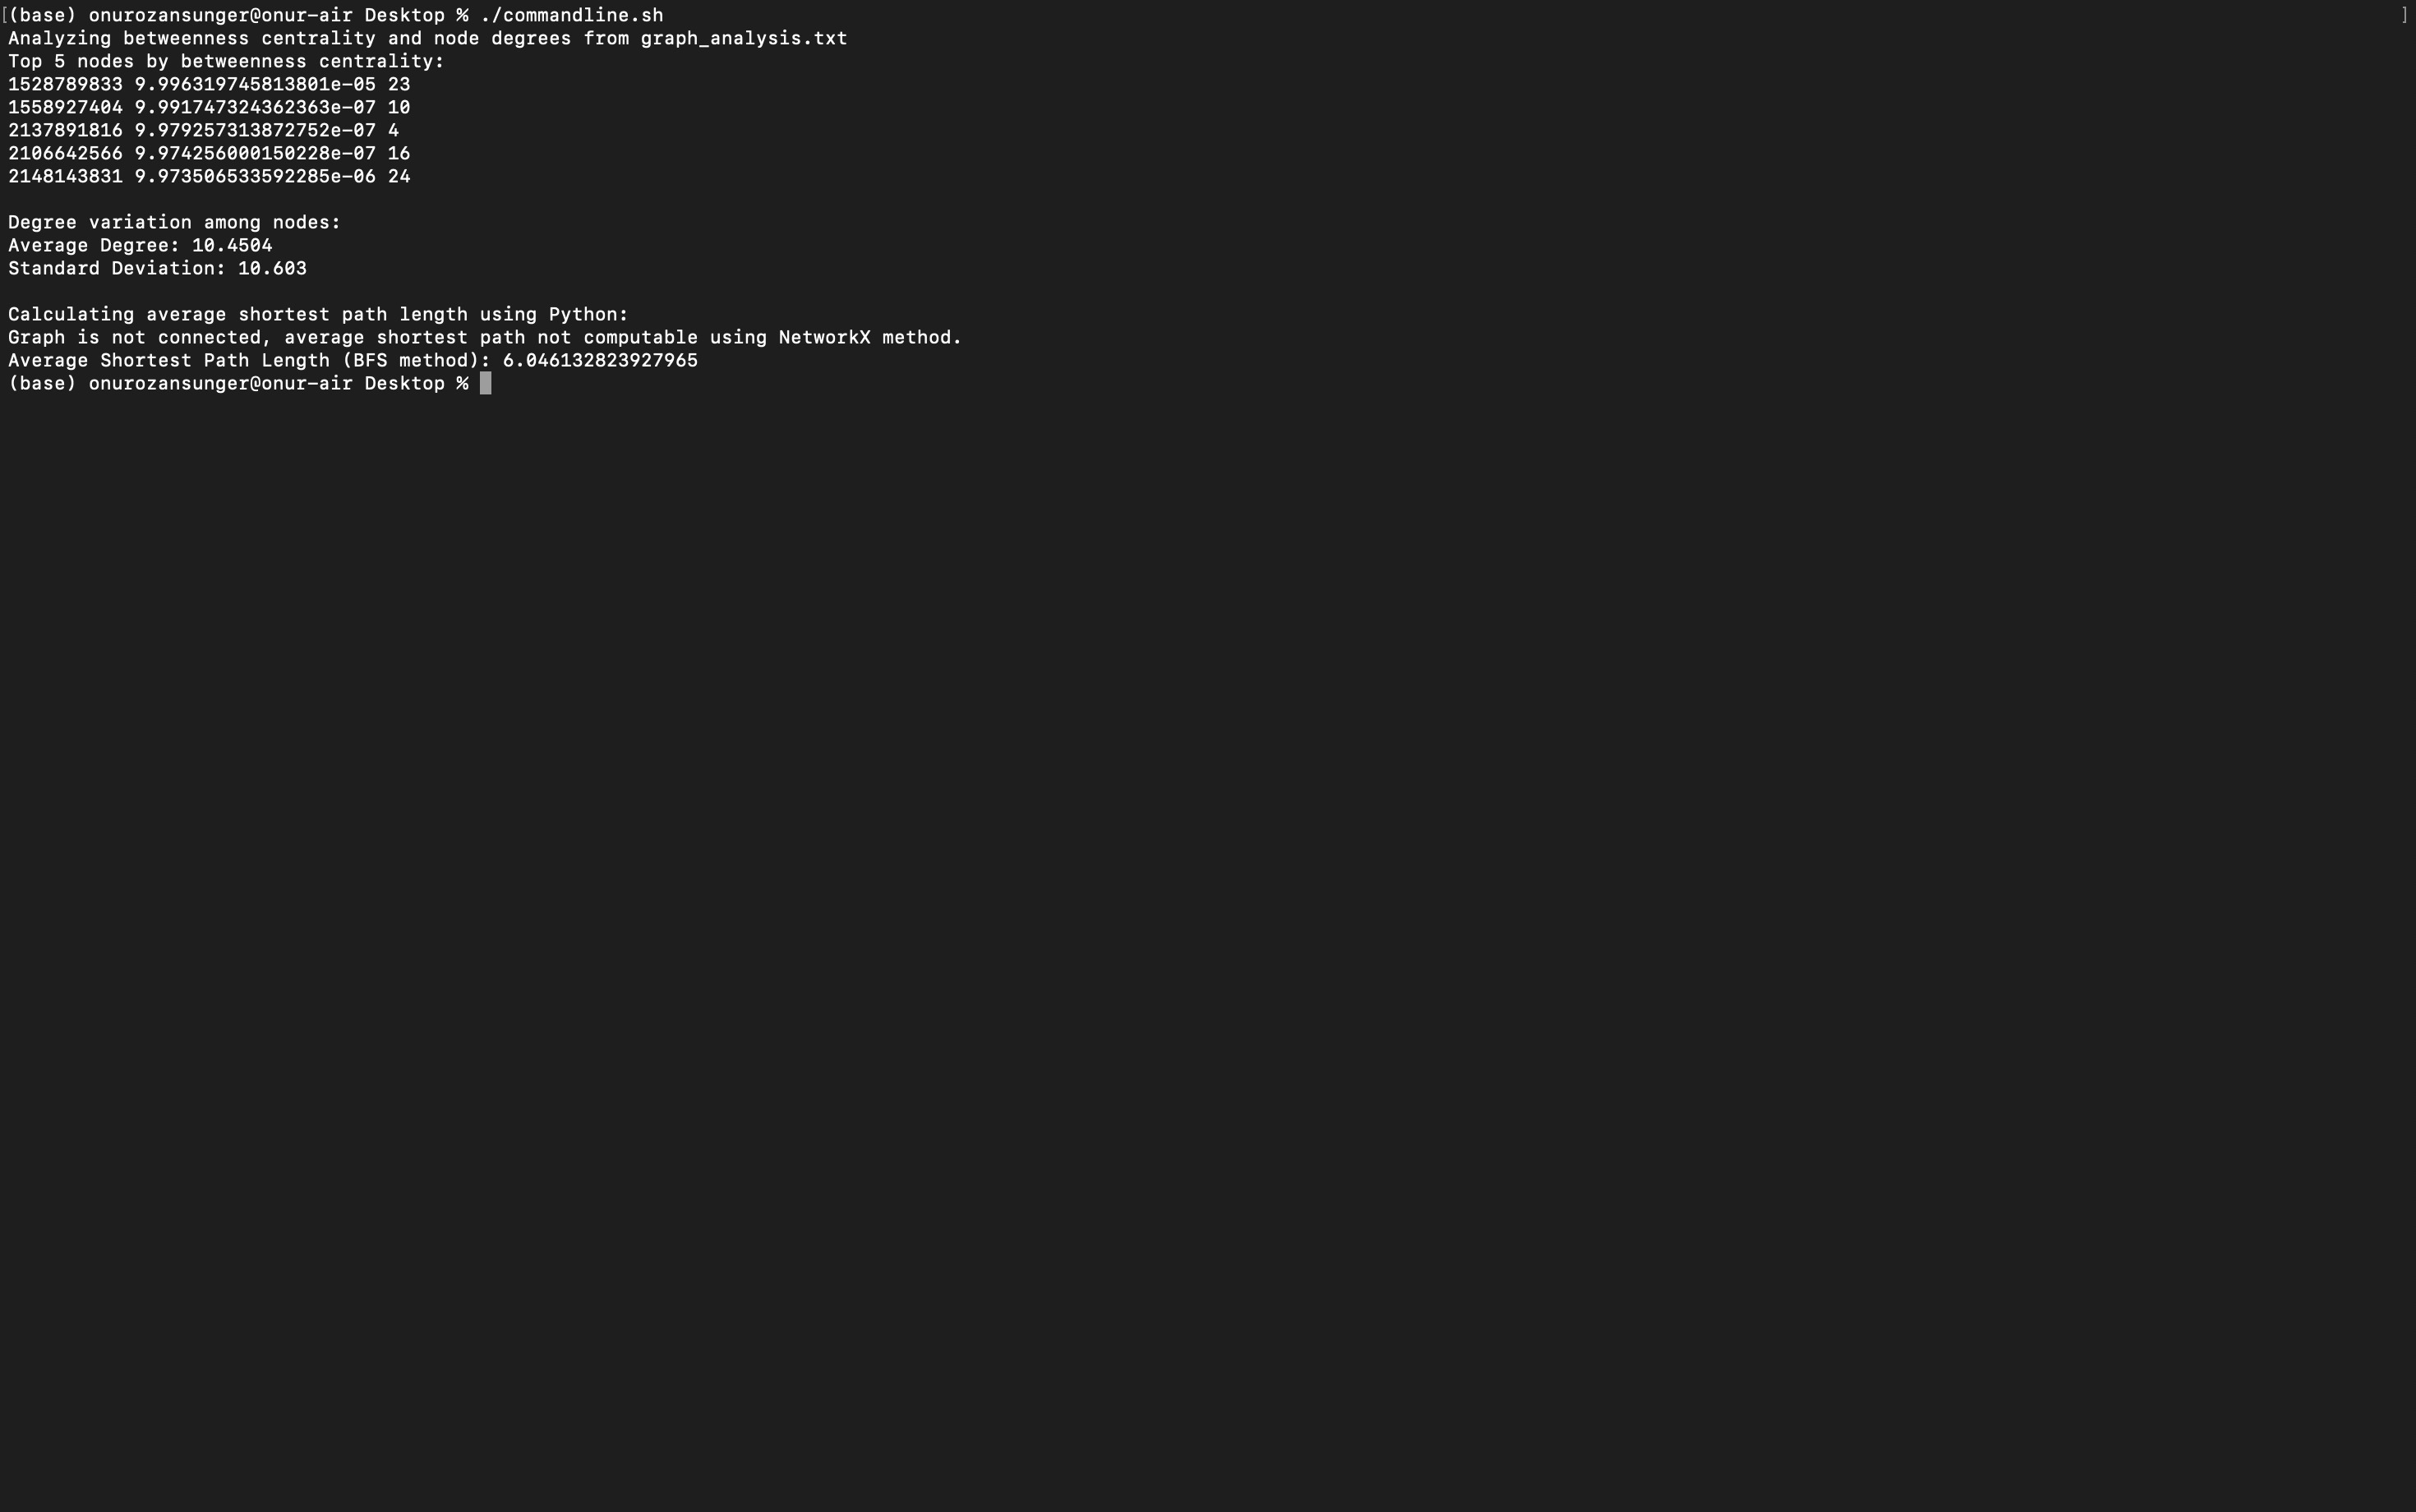